# Gaussian Discriminant Analysis

Any time we have a classification problem in which the class-conditional data
are nearly Gaussian, this method would be nearly optimal.

To demonstrate, let's generate data from two overlapping 2D Gaussians.

The Gaussian density is defined as

$$p(\mathbf{x}; \mu, \Sigma) = \frac{1}{(2\pi)^{(k/2)}|\Sigma|^{(1/2)}}e^{-\frac{1}{2}(\mathbf{x}-\mu)\Sigma^{-1}(\mathbf{x}-\mu)}$$

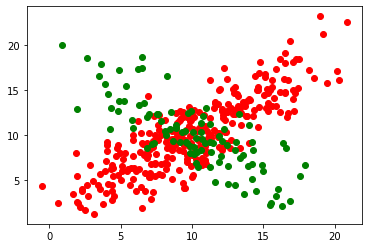

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data

mu1 = np.array([10, 10])
mu2 = np.array([10, 10])

sigma1 = np.array([[15, 12], [12, 15]])
sigma2 = np.array([[15, -12], [-12, 15]])

X1 = np.random.multivariate_normal(mu1, sigma1, 300)
X2 = np.random.multivariate_normal(mu2, sigma2, 100)

plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'go')
plt.show()


Given these data, we estimate the parameters of the GDA from the data.

In [15]:
# Estimate means and covariances

mu_r = X1.mean(axis=0)
mu_g = X2.mean(axis=0)
cov_r = np.cov(X1.T)
cov_g = np.cov(X2.T)
p_y_1 = X1.shape[0] / (X1.shape[0] + X2.shape[0])
p_y_2 = X2.shape[0] / (X1.shape[0] + X2.shape[0])


In [52]:
# Inference: p(Y=y|X=x) propto p(X=x|Y=y)p(Y=y)

X = np.concatenate((X1, X2), 0)
y = np.concatenate((np.zeros((X1.shape[0], 1)), np.ones((X2.shape[0], 1))), 0)

def gauss_density(X, mu, sigma):
    k = X.shape[1]
    siginv = np.linalg.inv(sigma)
    d = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
        x = X[i,:]
        d[i] = -0.5 * (x-mu) @ siginv @ (x-mu)
    return (2 * np.pi)**(-k/2) / np.sqrt(np.linalg.det(sigma)) * np.exp(d)        

# p(X=x | Y=1)

p_x_y1 = gauss_density(X, mu_r, cov_r)

# p(X=x | Y=2)

p_x_y2 = gauss_density(X, mu_g, cov_g)

# p(X=x | Y=1) p(Y=1)

p_y1 = p_x_y1 * p_y_1

# p(X=x | Y=2) p(Y=2)

p_y2 = p_x_y2 * p_y_2

# Normalize

normalizer = p_y1 + p_y2

# p(Y=1 | X=x)

p_y1 = p_y1 / normalizer

# p(Y=2 | X=x)

p_y2 = p_y2 / normalizer

# Finished!

train_acc = (np.concatenate((p_y1, p_y2), 1).argmax(axis=1)==y.reshape(-1)).sum() / X.shape[0]
print('Training accuracy: %f' % train_acc)

Training accuracy: 0.862500


array([[5.15962094e-01],
       [9.83653597e-01],
       [9.73931590e-01],
       [8.97831808e-01],
       [9.99989172e-01],
       [7.57574869e-01],
       [8.11118360e-01],
       [7.55204230e-01],
       [9.99392986e-01],
       [7.62109537e-01],
       [1.00000000e+00],
       [7.70098736e-01],
       [6.93431957e-01],
       [7.53204821e-01],
       [9.99999998e-01],
       [9.62139826e-01],
       [9.99721092e-01],
       [9.04655306e-01],
       [6.33153948e-01],
       [9.99999999e-01],
       [9.99229846e-01],
       [9.99999986e-01],
       [7.10164015e-01],
       [9.71800664e-01],
       [7.13047070e-01],
       [8.17388303e-01],
       [9.99999998e-01],
       [8.05738783e-01],
       [5.83702948e-01],
       [6.45211951e-01],
       [9.99991570e-01],
       [9.43816592e-01],
       [7.68417870e-01],
       [9.99998124e-01],
       [9.89357631e-01],
       [9.71668308e-01],
       [9.99993589e-01],
       [4.59249225e-01],
       [9.95793039e-01],
       [7.27969845e-01],
